<a href="https://colab.research.google.com/github/JuanDaGue/Rlativity-/blob/main/TareaN%C2%B02_GalCosi_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings


#Tarea N°2 Gal_Cos

<Center>

#Misiones y observatorios

##Juan David Guerrero U $\qquad$ CC. 1059705736



Fotometría superficial de galaxias Fecha de entrega: La fecha de entrega de esta asignación se definirá en clase Objetivo: Usar en un contexto práctico los conceptos de las propiedades del brillo superficial de galaxias y conocer herramientas disponibles para realizar análisis de fotometría superficial en galaxias.
En el anexo encuentra un par de imágenes reducidas de las galaxias $\mbox{M}87$ y $\mbox{M}100$.
Utilice la tarea ellipse de iraf (stsdas.analysis.isophote.ellipse) para ajustar isofotas elípticas a la distribución superficial de brillo de ambas galaxias.


**1)** La tarea ellipse produce resultados en forma de tabla binaria que se puede convertir a tabla ascii como el task tprint (*tprint tabla_binario.tab > tabla_ascii.dat*) y con ello grafique el perfil superficial
de brillo de la galaxia. (que va a usar como radio?)


**Sln**

Para usar la tarea elipse es necesario configurar los siguientes parámetros, como se ve en la siguiente figura fig1. Estos parámetros se pueden determinar usando el entorno de **iraf** y el visualizado **ds9**.

[Fig1]

<a href="https://ibb.co/SxhkLhz"><img src="https://i.ibb.co/DbxBqxZ/Captura-de-pantalla-de-2020-10-29-17-50-16.png" alt="Captura-de-pantalla-de-2020-10-29-17-50-16" border="0"></a>

Las tablas retornadas por la tarea elipse, se imprimen en un archivos .dat, en los cuales se encuentra toda la información del perfil de brillo de las galaxias.

Lo interesante de estos perfiles de brillo de la superficie son un indicio del proceso de formación. ya que las galaxias son el producto de diferentes historias de fusiones en las que diferentes morfologías y geometrías se unen para producir  una variedad de galaxias.

In [ ]:
from google.colab import files
uploaded=files.upload()

#Importar los archivos ascii.dat

Saving M87Table_acsii.dat to M87Table_acsii (4).dat
Saving M100Table_ascii.dat to M100Table_ascii (4).dat


In [ ]:
#Funciones para los ejustes del brillo superficial

# Perfil de Sercis
def func(x, a, b, c):
     return a*(np.exp(-x/b)**(1/c))
#Vaucoulers
def Vau(x, a, b,c):
     return a*(np.exp(-x/b))**(1/4)+c
def Ellipse(f,e,a):
  P=a*(1-e**2)
  return (P)/(1+e*np.cos(f))



Importando los datos de M87

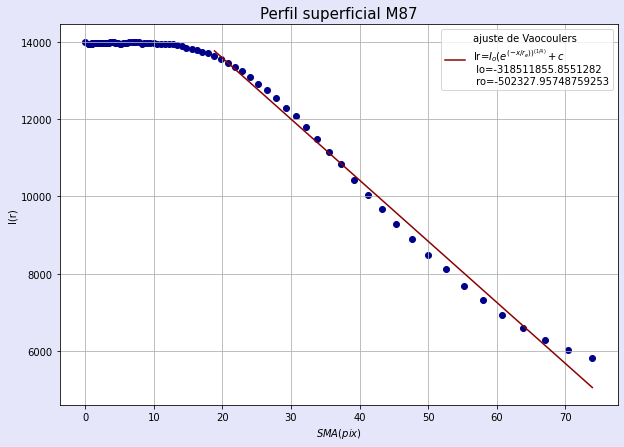

In [ ]:
c=np.loadtxt("M87Table_acsii.dat",dtype='str',skiprows=0 ,usecols=[0,1,2,3,4,5,6,7])[0:104]
d=np.loadtxt("M87Table_acsii.dat",dtype='str',skiprows=0 ,usecols=[0,1,2,3,4,5,6,7])[104:208]
e=np.loadtxt("M87Table_acsii.dat",dtype='str',skiprows=0 ,usecols=[0,1,2,3,4,5,6,7])[208:312]
f=np.loadtxt("M87Table_acsii.dat",dtype='str',skiprows=0 ,usecols=[0,1,2,3,4,5,6,7])[312:416]
g=np.loadtxt("M87Table_acsii.dat",dtype='str',skiprows=0 ,usecols=[0,1,2,3,4,5,6,7])[416:520]
row=c[:,0].astype(np.float)
a_pix=c[:,1].astype(np.float)
Inten=c[:,2].astype(np.float)
RSM=(c[:,5])
Ellip=c[:,6]
RSM[0], Ellip[0]='nan','nan'
RSM,Ellip=RSM.astype(np.float),Ellip.astype(np.float)
RSMA_pix=e[:,1].astype(np.float)

e[0],f[0],g[0]='nan','nan','nan'
e,f,g=e.astype(np.float),f.astype(np.float),g.astype(np.float)
"""Ajustes"""
N1,N2=75,104
popt1, pcov1 = curve_fit(func, a_pix[N1:N2], Inten[N1:N2]) # Intepolacion 'ajuste de evauculer'
popt, pcov = curve_fit(Vau, a_pix[N1:N2], Inten[N1:N2]) 

# Grafica

plt.figure(figsize=(10,7), edgecolor='c',facecolor='lavender')
#plt.plot(a_pix[N1:N2],func(a_pix[N1:N2], *popt1),'k',label='ajuste Sersic\n \n' )
plt.plot(a_pix[N1:N2],Vau(a_pix[N1:N2], *popt),color='darkred', label='ajuste de Vaocoulers\n' r'Ir=$I_o(e^{(-x/r_e))^{(1/4)}}+c$' '\n Io='+str(popt[0])+'\n ro='+str(popt[1]))
plt.scatter(a_pix,Inten,color='darkblue',marker='o')
plt.title("Perfil superficial M87", fontsize=15)
plt.ylabel("I(r)")
plt.xlabel(r"$SMA(pix)$")
plt.legend()
plt.grid()


Para M100

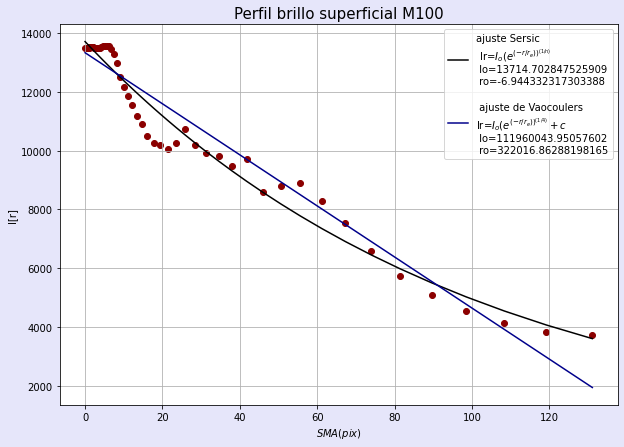

In [ ]:
M100=np.loadtxt("M100Table_ascii.dat",dtype='str',skiprows=0 ,usecols=[0,1,2,3,4,5,6,7])[0:60]
d2=np.loadtxt("M100Table_ascii.dat",dtype='str',skiprows=0 ,usecols=[0,1,2,3,4,5,6,7])[60:120]
e2=np.loadtxt("M100Table_ascii.dat",dtype='str',skiprows=0 ,usecols=[0,1,2,3,4,5,6,7])[120:180]
f2=np.loadtxt("M100Table_ascii.dat",dtype='str',skiprows=0 ,usecols=[0,1,2,3,4,5,6,7])[180:240]
g2=np.loadtxt("M100Table_ascii.dat",dtype='str',skiprows=0 ,usecols=[0,1,2,3,4,5,6,7])[241:300]

row_M100,apix_M100,Inten_M100,RSM_M100,Ellip_M100 =M100[:,0].astype(np.float),M100[:,1].astype(np.float),M100[:,2].astype(np.float),(M100[:,5]),M100[:,6]
e2[0],f2[0],g2[0],RSM_M100[0], Ellip_M100[0]='nan','nan','nan','nan','nan'
e2,f2,g2,RSMA_pix_M100,MAG_M100=e2.astype(np.float),f2.astype(np.float),g2.astype(np.float),e2[:,1].astype(np.float), e2[:,2].astype(np.float)
RSM_M100, Ellip_M100 = RSM_M100.astype(np.float), Ellip_M100.astype(np.float)


"""Ajustes"""

popt1, pcov1 = curve_fit(func, apix_M100, Inten_M100) # Intepolacion 'ajuste de evauculer'
popt, pcov = curve_fit(Vau, apix_M100, Inten_M100) 

# Grafica
plt.figure(figsize=(10,7), edgecolor='c',facecolor='lavender')
plt.plot(apix_M100,func(apix_M100, *popt1),'k',label='ajuste Sersic \n 'r'Ir=$I_o(e^{(-r/r_e))^{(1/n)}}$''\n Io=' +str(popt1[0])+'\n ro='+str(popt1[1]))
plt.plot(apix_M100,Vau(apix_M100, *popt),color='darkblue', label='\n ajuste de Vaocoulers\n' r'Ir=$I_o(e^{(-r/r_e))^{(1/4)}}+c$' '\n Io='+str(popt[2])+'\n ro='+str(-popt[1]))
plt.scatter(apix_M100,Inten_M100,color='darkred',marker='o')
plt.title("Perfil brillo superficial M100", fontsize=15)
plt.ylabel("I[r]")
plt.xlabel(r"$SMA(pix)$")
plt.legend()
plt.grid()

**2)** A cada uno de los perfiles de brillo ajuste el correspondiente perfil (de Vaucoulers o Sersic) y estime
las características del perfil de brillo superficial de las galaxias. (Use la herramienta de ajuste de su
preferecia.)


**Sln**

Sabemos que el perfil de Sercic se escribe así:
$$I(r)=I_oe^{\beta\left(\frac{r}{r_e}\right)^{(1/n)}}$$

Donde $I_o$ es la intensidad central, y $r_e$ es el radio efectivo.
Para el perfil de Vaucouler se tiene que n=4
>Según los ajustes echos con la rutina *curve_fit* de scicpy, tenemos que para $\mbox{M}87$ La galaxia tiene una intensidad central de $I_o=3.18\times 10^{08}$,  con un $r_e=5.02\times 10^{05}$, que es el radio al cual de emite la mitad de la radiación de $\mbox{M}87$

>Para $\mbox{M}100$ tenemos que la galaxia tiene un brillo superficial central $I_o=1.371\times10^4$, con un $r_e$ de $3.94 \mbox{ pix}$.

Se puede ver que la intensidad es mucho mayor en $\mbox{M}87$, pero en $\mbox{M}87$ la mitad de del flujo se emite a un radio de $r_e=5.02\times 10^5 \mbox{ pix}$, mientras que para $\mbox{M}100$ es solo de $r_e=3.94 \mbox{ pix}$

**3)** Utilice los tasks isopall e isoplot del paquete ellipse (o su graficador preferido si decide usar los datos en el formato ascii para esto) para graficar los resultados del análisis de las isofotas.
Que puede concluir para su galaxia acerca de los valores de $\mbox{A}3$ y $\mbox{A}4$? Que significan? Consulte que significa esta relación.


**Sln**

Veamos que son los valores de $A3$ y $A4$

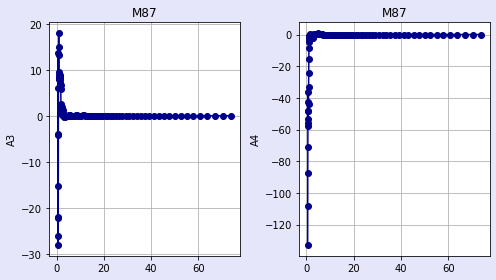

In [ ]:
A4=np.loadtxt("M87Table_acsii.dat",dtype='str',skiprows=329 ,usecols=[8])[1:104]
plt.figure(figsize=(7,4),edgecolor='c',facecolor='lavender')
plt.subplot(1,2,1)
plt.ylabel('A3')
plt.title('M87')
plt.grid()
plt.plot(a_pix,f[:,4],'darkblue',marker='o')
plt.subplot(1,2,2)
plt.title('M87')
plt.plot(a_pix[1:104],A4.astype(np.float),'darkblue',marker='o')
plt.ylabel('A4')
plt.grid()
plt.tight_layout()

**Para M100**

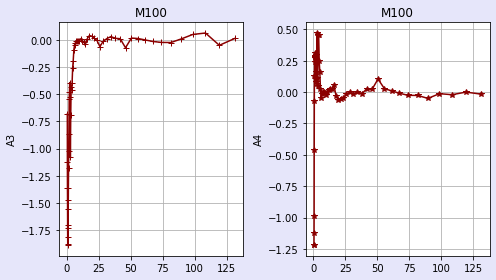

In [ ]:
f2=np.loadtxt("M100Table_ascii.dat",dtype='str',skiprows=195 ,usecols=[0,4,8])[1:60]
plt.figure(figsize=(7,4),edgecolor='c',facecolor='lavender')
plt.subplot(1,2,1)
plt.ylabel('A3')
plt.title('M100')
plt.grid()
plt.plot(apix_M100[1:60],f2[:,1].astype(np.float),'darkred',marker='+')
plt.subplot(1,2,2)
plt.title('M100')
plt.plot(apix_M100[1:60],f2[:,2].astype(np.float),'darkred',marker='*')
plt.ylabel('A4')
plt.grid()
plt.tight_layout()

$$y=y_0 +An\sin(n\times E)+bn \cos(n\times E)$$

Donde los ceficientes $An$, $Bn$ son las amplitudes armonicas

**4)** Como cambia la elipticidad como una función del radio para cada galaxia?
Que significará la elipticidad de las elipses en el caso de la fotometría superficial de la galaxia espiral?
La puede usar para estimar la inclinación del disco galáctico?


**Sln**


Text(0.5, 1.0, 'M87')

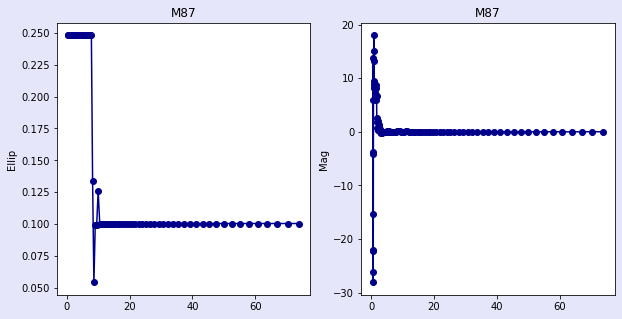

In [ ]:
plt.figure(figsize=(10,5), edgecolor='c',facecolor='lavender')
#fig.subtitle('m')

plt.subplot(1,2,2)
plt.plot(a_pix,f[:,4],color='darkblue',marker='o')
plt.ylabel('Mag')
plt.title('M87')
plt.subplot(1,2,1)
plt.plot(a_pix,Ellip,color='darkblue',marker='o')
plt.ylabel('Ellip')
plt.title('M87')

**Para M100**

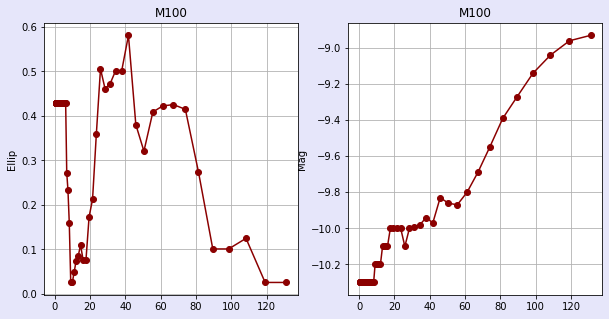

In [ ]:
plt.figure(figsize=(10,5), edgecolor='c',facecolor='lavender')

plt.subplot(1,2,2)
plt.plot(apix_M100,MAG_M100,color='darkred',marker='o')
plt.ylabel('Mag')
plt.title('M100')
plt.grid()
plt.subplot(1,2,1)
plt.plot(apix_M100,Ellip_M100.astype(np.float),color='darkred',marker='o')
plt.ylabel('Ellip')
plt.title('M100')
plt.grid()


Se puede ver que en la galaxia $M87$ la elipticidad no cambia mucho con respecto al radio, con una elipticidad en la zona central de $0.25$, esta galaxia es de tipo $E0$ ya que en las regiones mas exteriores de esta tiene una excentricidad muy baja de $0.1$, mientras que en la galaxia espiral $M100$, la elipticidad cambia mucho con respecto alradio, esto se debe en parte a los brasos expirales de la galxia, que modifican la forma de las isofotas, 

Si es posible conocer la inclinación de la galaxia, conociendo el trazado de izofotas, ya que una gfalaxia al poseer inclinacion, hace que a la hora de observar las isofotas, estas se vean con una excentricidad diferente, ademas de que en la parte mas lejana las isofotas parecerian mas cercanas entre si, por lo que un observador   que mire a lo largo del eje z vería una
Galaxia EO (redonda), cuando se ve en un ángulo
ver una forma elíptica con relación de eje aparente
$q = b / a$. 
la cual se relaciona con el angulo de inclinación
$$\tan i =\frac{dx}{dz}=-\frac{z a²}{x b²}$$

donde a es el semieje mayor y b es el semieje menor 

**5)** Investigue que otro u otros paquetes hay disponibles en el medio para hacer análisis de fotometría superficial de galaxias (No tienen que estar en el ambiente de **IRAF**). 

Deberá entregar las imágenes, las gráficas y los resultados del análisis e interpretación de los resultados.
Nota: El manual de usuario del task ellipse está anexo a este documento. Estúdielo bien antes de iniciar.!

**Sln**

Hay varios buenos paquetes de software alternativos como: AIPS, MIDAS e IDL. Los primeros tres paquetes se pueden obtener de forma gratuita, mientras que IDL es un paquete comercial que se puede utilizar en todo tipo de plataformas informáticas y se utiliza ampliamente en astronomía espacial (por ejemplo, lenguaje principal de paquetes de reducción de software de misiones como IUE, HST, ROSAT, SOHO, etc.). Todos estos paquetes pueden manejar algunos de los formatos de datos científicos y comerciales más comunes (FITS, CDF y HDF). 
Tambien existe PyRAF, el cual es un programa que permite ejecutar las tareas de iraf usando el lenguaje de programación Python. Ofrece a los usuarios la capacidad de ejecutar tareas IRAF en un entorno que tiene todo el poder y la flexibilidad de Python

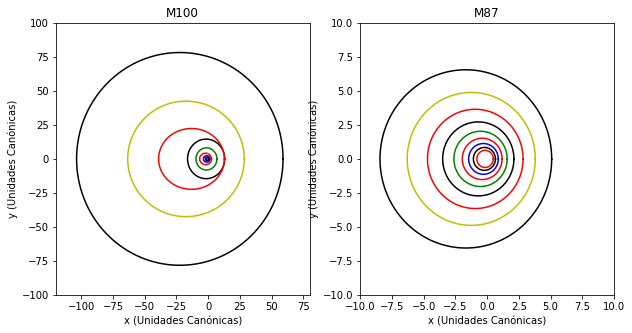

In [ ]:
f_T=np.linspace(0,2*np.pi,1000)
N=int (len(apix_M100)/10)
plt.figure(figsize=(10,5))
for i in range(10):
  # Posición del cometa
  X=Ellipse(f_T,Ellip_M100[i*N],apix_M100[i*N])*np.cos(f_T)
  Y=Ellipse(f_T,Ellip_M100[i*N],apix_M100[i*N])*np.sin(f_T)
  X1=Ellipse(f_T,Ellip[i*N],a_pix[i*N])*np.cos(f_T)
  Y1=Ellipse(f_T,Ellip[i*N],a_pix[i*N])*np.sin(f_T)

  Col=['b','r','black','b','r','g','black','r','y','black','b','r','g']
  ###Gráfico

  plt.subplot(1,2,1)
  plt.plot(X,Y,Color=Col[i])
  plt.title("M100")
  plt.xlabel("x (Unidades Canónicas)")
  plt.ylabel("y (Unidades Canónicas)")
  plt.xlim(-120,80)
  plt.ylim(-100,100)
  
  
  plt.subplot(1,2,2)
  plt.plot(X1,Y1,Color=Col[i])
  plt.title("M87")
  plt.xlabel("x (Unidades Canónicas)")
  plt.ylabel("y (Unidades Canónicas)")
  plt.xlim(-10,10)
  plt.ylim(-10,10)
  
  warnings.simplefilter("ignore")
